In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_IND=df[df['job_country']=='India']

In [3]:
df_skills= df_IND.explode('job_skills')
df_skills[['job_title', 'job_skills']]

,job_title,job_skills
16,Big Data Engineer,powershell
16,Big Data Engineer,python
16,Big Data Engineer,sql
16,Big Data Engineer,mysql
16,Big Data Engineer,sql server
...,...,...
785716,Application Support Analyst,c#
785716,Application Support Analyst,sql
785718,Senior Performance QA Analyst,None
785740,AWS System Analyst,aws


In [4]:
df_skills_count= df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count= df_skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)
df_skills_count

,job_skills,job_title_short,skill_count
1374,sql,Data Engineer,12993
1088,python,Data Engineer,11568
1089,python,Data Scientist,9248
1327,spark,Data Engineer,7157
103,aws,Data Engineer,6993
...,...,...,...
389,esquisse,Data Scientist,1
887,node.js,Senior Data Analyst,1
753,matlab,Cloud Engineer,1
411,fastapi,Cloud Engineer,1


In [5]:
job_titles = df_skills_count['job_title_short'].unique()
job_titles =sorted(job_titles[:3])
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

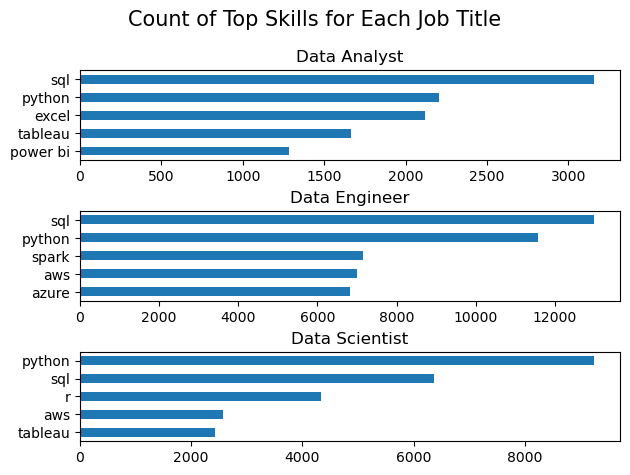

In [6]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
  df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
  df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title, legend=False)
  ax[i].invert_yaxis()
  ax[i].set_ylabel('')
    
fig.suptitle('Count of Top Skills for Each Job Title', fontsize=15)
fig.tight_layout(h_pad=0.5)
plt.show()


In [7]:
df_job_title_count=df_IND['job_title_short'].value_counts().reset_index(name='jobs_total')

In [8]:
df_skills_perc=pd.merge(df_skills_count, df_job_title_count, how='left',on='job_title_short')

df_skills_perc['skill_percent']=df_skills_perc['skill_count']/df_skills_perc['jobs_total']*100

df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,sql,Data Engineer,12993,19062,68.161788
1,python,Data Engineer,11568,19062,60.686182
2,python,Data Scientist,9248,13279,69.643798
3,spark,Data Engineer,7157,19062,37.545903
4,aws,Data Engineer,6993,19062,36.685552
...,...,...,...,...,...
1684,esquisse,Data Scientist,1,13279,0.007531
1685,node.js,Senior Data Analyst,1,1083,0.092336
1686,matlab,Cloud Engineer,1,351,0.284900
1687,fastapi,Cloud Engineer,1,351,0.284900


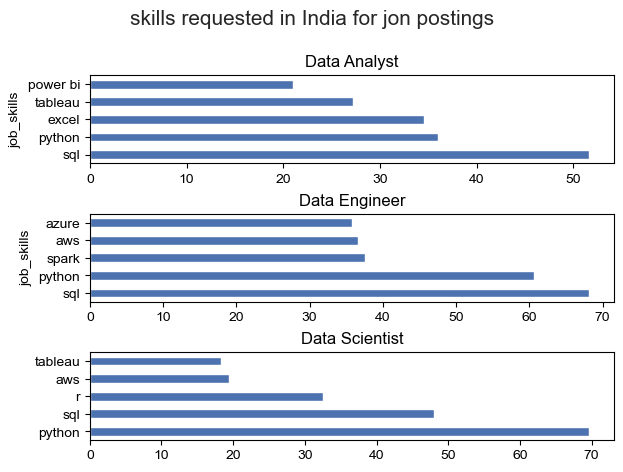

In [9]:
import seaborn as sns

fig, ax = plt.subplots(len(job_titles), 1)
sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
   df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
   df_plot.plot(kind='barh', x='job_skills', y='skill_percent', ax=ax[i], title=job_title, legend=False)

ax[i].set_ylabel('')
ax[i].set_xlabel('')
    
fig.suptitle('skills requested in India for jon postings', fontsize=15)
fig.tight_layout(h_pad=0.5)
plt.show()